In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
data = pd.read_excel('/content/drive/MyDrive/corizo_projects/WineQuality/wineData.xlsx')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.52,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.52,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.52,0.71,10.2,5.0


###**METADATA**

In [3]:
data.shape

(1599, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1598 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


#**DATA CLEANSING**

---

##**1. Handling missing values**
> There are 3 columns with null values

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
data[data['total sulfur dioxide'].isna() | data['quality'].isna() | data['pH'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [8]:
#Dropping NA values
data.dropna(inplace = True)
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##**2. Checking column datatypes**
> The data types seem appropriate for the respective columns.

In [9]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [10]:
(data['quality'] % 1 != 0).any() #checking if quality has any decimal values

False

In [11]:
value_counts_table = data['quality'].value_counts().reset_index()
value_counts_table.columns = ['Quality', 'Count']

print("Unique values and their counts in 'quality':")
print(value_counts_table)

Unique values and their counts in 'quality':
   Quality  Count
0      5.0    679
1      6.0    637
2      7.0    199
3      4.0     53
4      8.0     18
5      3.0     10


#**Exploratory Data Analysis (EDA)**

---

###**Predictive Variables (Features):**
1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol


###**Target Variable:**
1. Quality

<Axes: xlabel='quality', ylabel='count'>

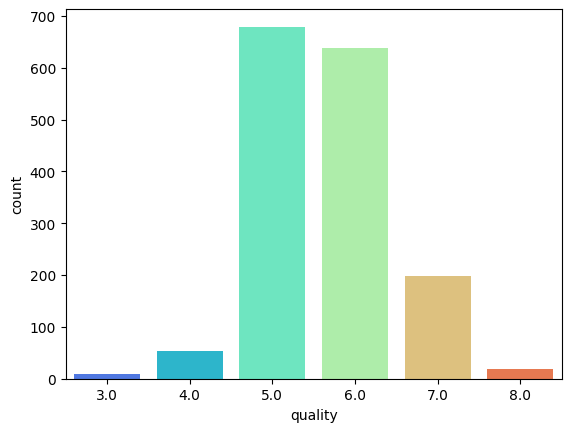

In [12]:
sns.countplot(x=data['quality'],palette='rainbow')

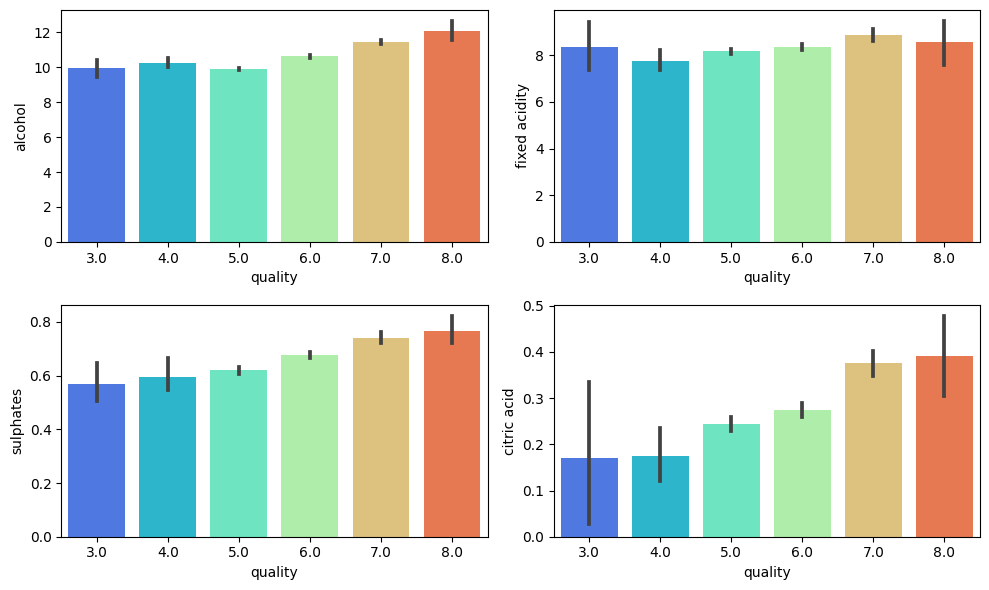

In [13]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='quality', y='alcohol', data=data, palette='rainbow')
plt.subplot(2, 2, 2)
sns.barplot(x='quality', y='fixed acidity', data=data, palette='rainbow')
plt.subplot(2, 2, 3)
sns.barplot(x='quality', y='sulphates', data=data, palette='rainbow')
plt.subplot(2, 2, 4)
sns.barplot(x='quality', y='citric acid', data=data, palette='rainbow')
plt.tight_layout()
plt.show()

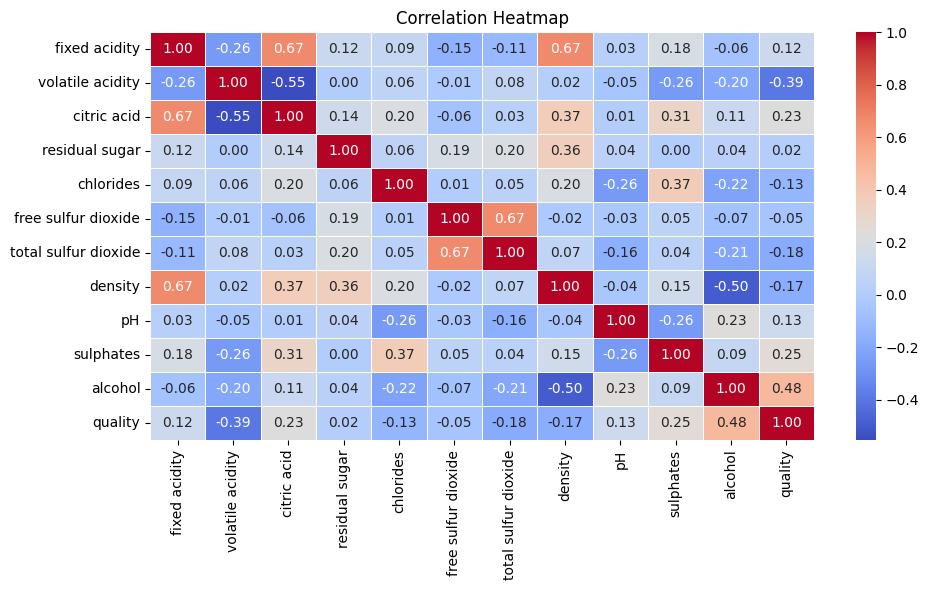

In [14]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data.corr(numeric_only=True), cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

###Meaningful Correlations

1. fixed.acidity vs. citric.acid (0.67)
2. fixed.acidity vs. density (-0.67)
3. volatile.acidity vs. citric acid (-0.55)
4. free sulfur dioxide vs total sulfur dioxide (0.67)

###**Box Plots for Outliers**

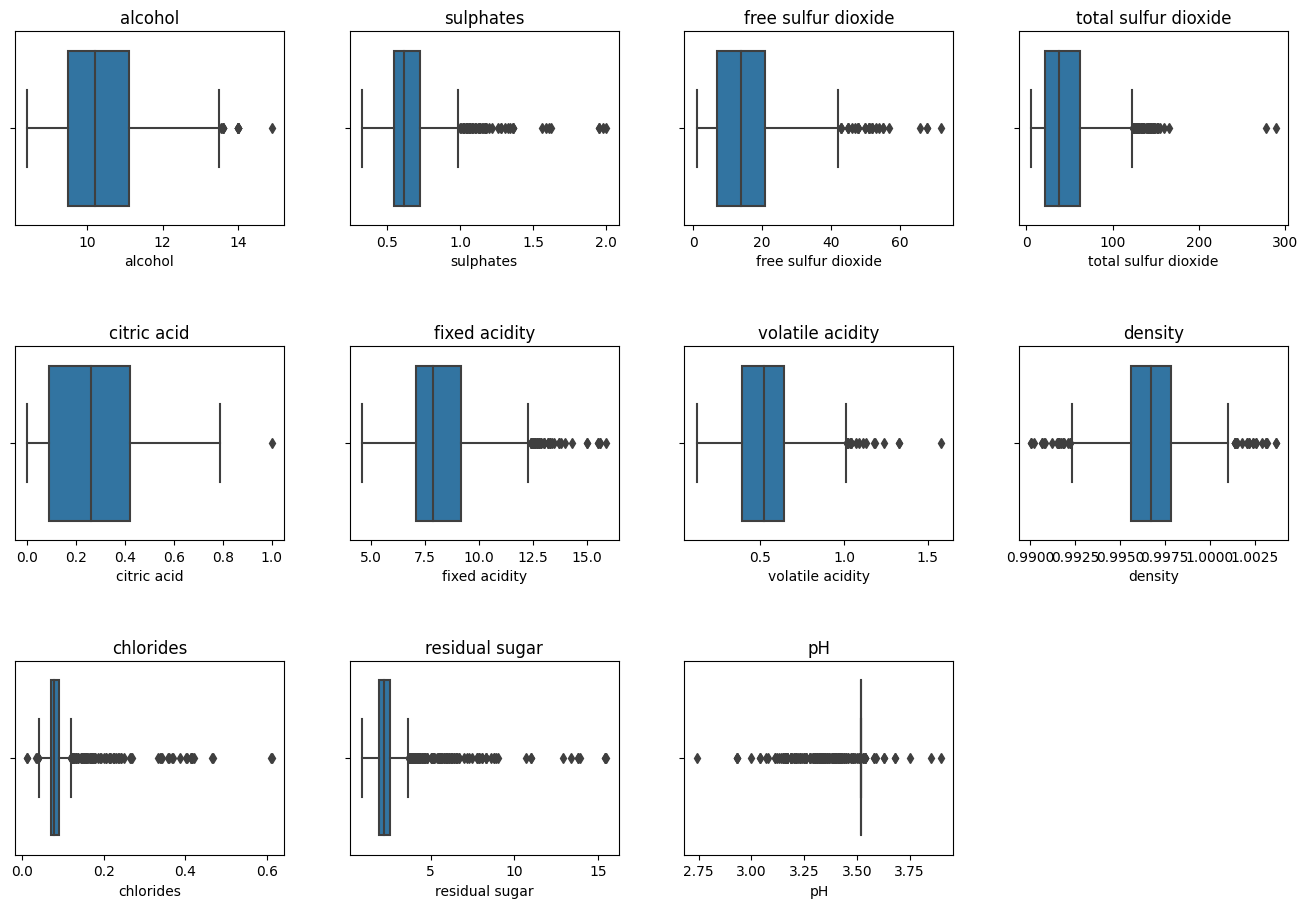

In [15]:
columns = ['alcohol', 'sulphates', 'free sulfur dioxide', 'total sulfur dioxide', 'citric acid', 'fixed acidity', 'volatile acidity',
           'density', 'chlorides', 'residual sugar', 'pH']

plt.figure(figsize=(14, 10))
for i, col in enumerate(columns, start=1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout(pad=4)
plt.show()

>Outliers present in all columns

#**Feature Engineering**

---
_**Pre-processing the entire dataset in order to feed the data into the ML Model**_

_**Referencing from the Above Plots**_

<br>

####1. Adding 'bound sulfur dioxide'
####2. Dropping useless columns
####3. Dropping Residual sugar as it does not have a high correlation

<br>

---


In [16]:
# 1. Adding 'bound sulfur dioxide'
data['bound sulfur dioxide'] = data['total sulfur dioxide'] - data['free sulfur dioxide']

# 2. Dropping useless columns
columns_to_drop = ['total sulfur dioxide', 'free sulfur dioxide']
data.drop(columns=columns_to_drop, inplace=True)

# 3. Dropping Residual sugar
data.drop(['residual sugar'],axis=1, inplace = True)
data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,density,pH,sulphates,alcohol,quality,bound sulfur dioxide
0,7.4,0.70,0.00,0.076,0.9978,3.51,0.56,9.4,5.0,23.0
1,7.8,0.88,0.00,0.098,0.9968,3.20,0.68,9.8,5.0,42.0
2,7.8,0.76,0.04,0.092,0.9970,3.26,0.65,9.8,5.0,39.0
3,11.2,0.28,0.56,0.075,0.9980,3.16,0.58,9.8,6.0,43.0
4,7.4,0.70,0.00,0.076,0.9978,3.51,0.56,9.4,5.0,23.0


##**Preprocessing data and handling 'Volume' outliers**

In [17]:
from sklearn.preprocessing import StandardScaler

columns = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'fixed acidity', 'bound sulfur dioxide', 'density', 'chlorides']

def find_outlier_limits(col_name):
    Q1, Q3 = data[col_name].quantile([.25, .75])
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    high = Q3 + (1.5 * IQR)
    return (high, low)

def preprocess_data(data):
    for col in columns:
        high_limit, low_limit = find_outlier_limits(col)
        data.loc[data[col] > high_limit, col] = high_limit
        data.loc[data[col] < low_limit, col] = low_limit

    scaler = StandardScaler()
    data[columns] = scaler.fit_transform(data[columns])

    columns_order = ['volatile acidity', 'fixed acidity', 'citric acid', 'chlorides', 'bound sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
    data = data[columns_order]
    return data

> Outliers have been handled

#**BUILDING MACHINE LEARNING MODELS AND EVALUATING THEM**
####**1. Linear Regression**
####**2. Random Forest Regressor**
####**3. Support Vector Regression (SVR)**
####**4. GradientBoostingRegressor**

In [18]:
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    return accuracy

# 1. Linear Regression
def train_evaluate_linear_regression(X_train, X_test, y_train, y_test):
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    predictions_lr = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, predictions_lr)
    accuracy_percentage_lr = accuracy(y_test, predictions_lr)

    print("\nLinear Regression Model:")
    print("Mean Squared Error:", mse_lr)
    print("Accuracy:", accuracy_percentage_lr)
    return predictions_lr

# 2. Random Forest Regressor
def train_evaluate_random_forest(X_train, X_test, y_train, y_test):
    rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=3, random_state = 822)
    rf_model.fit(X_train, y_train)
    predictions_rf = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, predictions_rf)
    accuracy_percentage_rf = accuracy(y_test, predictions_rf)

    print("\nRandom Forest Regressor Model:")
    print("Mean Squared Error:", mse_rf)
    print("Accuracy:", accuracy_percentage_rf)
    return predictions_rf

# 3. Support Vector Regression (SVR)
def train_evaluate_svr(X_train, X_test, y_train, y_test):
    svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
    svr_model.fit(X_train, y_train)
    predictions_svr = svr_model.predict(X_test)
    mse_svr = mean_squared_error(y_test, predictions_svr)
    accuracy_percentage_svr = accuracy(y_test, predictions_svr)

    print("\nSVR Model:")
    print("Mean Squared Error:", mse_svr)
    print("Accuracy:", accuracy_percentage_svr)
    return predictions_svr

# 4.GradientBoostingRegressor
def train_evaluate_gradient_boosting(X_train, X_test, y_train, y_test):
    gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
    gb_model.fit(X_train, y_train)
    predictions_gb = gb_model.predict(X_test)
    mse_gb = mean_squared_error(y_test, predictions_gb)
    accuracy_percentage_gb = accuracy(y_test, predictions_gb)
    print("\nGradient Boosting Regressor Model:")
    print("Mean Squared Error:", mse_gb)
    print("Accuracy:", accuracy_percentage_gb)
    return predictions_gb

####**Visualizing predictions**

In [19]:
def visualize_predictions(actual, predicted, model_name):
    plt.figure(figsize=(10, 5))
    residuals = actual - predicted
    sns.scatterplot(x=actual, y=predicted, hue=residuals, palette='inferno', alpha=0.8)
    plt.title(f"{model_name} - Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.legend(title='Error, actual - predicted')
    plt.show()
    print("\n")

##**Results**

In [20]:
data = preprocess_data(data)

X = data[['volatile acidity', 'fixed acidity', 'citric acid', 'chlorides', 'bound sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=569)

predictions_lr = train_evaluate_linear_regression(X_train, X_test, y_train, y_test)
predictions_rf = train_evaluate_random_forest(X_train, X_test, y_train, y_test)
predictions_svr = train_evaluate_svr(X_train, X_test, y_train, y_test)
predictions_gb = train_evaluate_gradient_boosting(X_train, X_test, y_train, y_test)


Linear Regression Model:
Mean Squared Error: 0.28636850515845486
Accuracy: 92.68270589239994

Random Forest Regressor Model:
Mean Squared Error: 0.21008526364175878
Accuracy: 94.05353987740929

SVR Model:
Mean Squared Error: 0.31961059323690577
Accuracy: 93.0562733264684

Gradient Boosting Regressor Model:
Mean Squared Error: 0.2540994272945255
Accuracy: 92.90635659963519


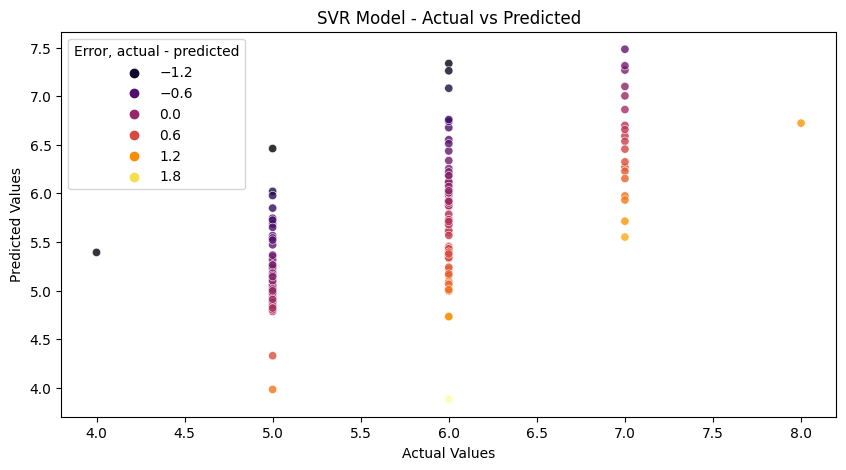

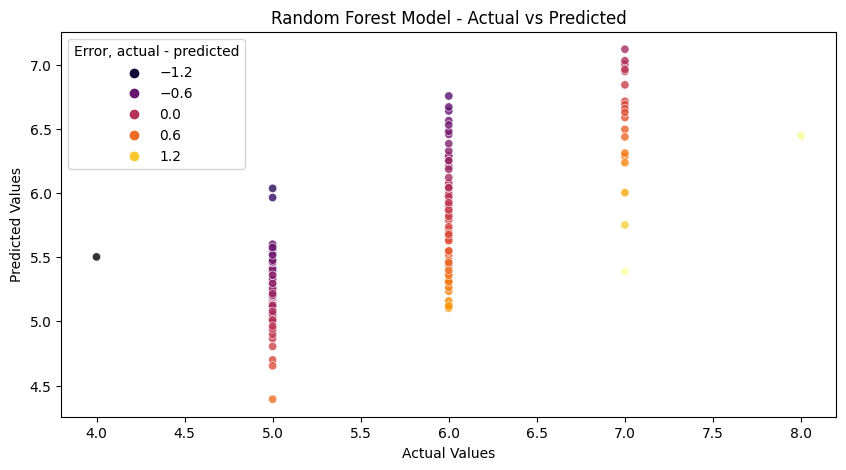

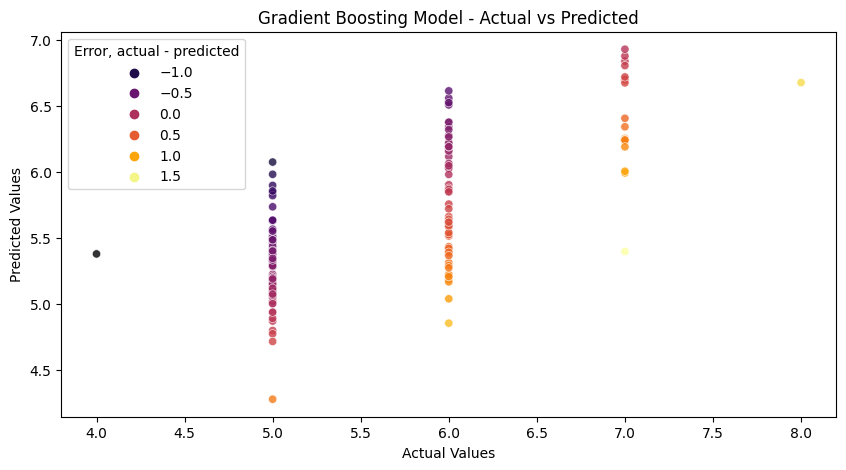

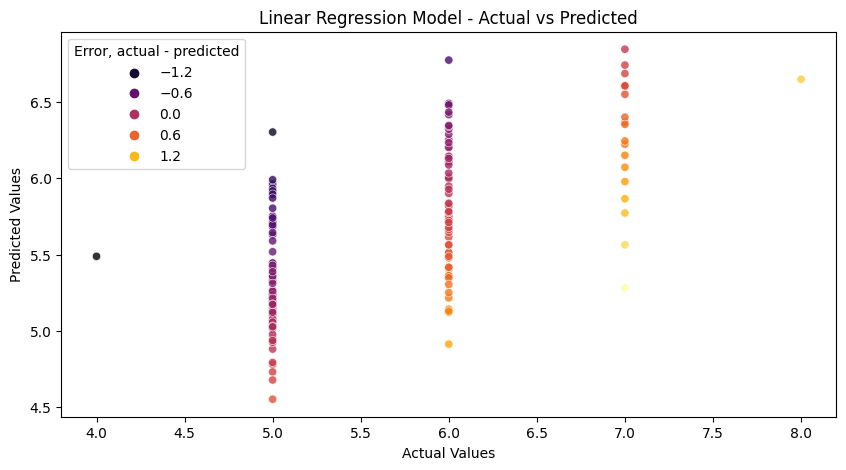

In [21]:
visualize_predictions(y_test, predictions_svr, "SVR Model")
visualize_predictions(y_test, predictions_rf, "Random Forest Model")
visualize_predictions(y_test, predictions_gb, "Gradient Boosting Model")
visualize_predictions(y_test, predictions_lr, "Linear Regression Model")

#**🚀 Conclusion**

---

<br>

_The thorough evaluation of various regression models for wine quality analysis has provided updated insights into their performance metrics:_

- _**Linear Regression** achieved a commendable **MSE of 0.2864**, with an accuracy rate of **92.68%**. This model demonstrates robust predictive capabilities, offering reliable accuracy in predicting wine quality._

- _**Random Forest Regressor** exhibited an improved **MSE of 0.2101**, along with an impressive accuracy of **94.05%**. With a lower MSE and high accuracy, this model stands out as a strong candidate for wine quality analysis._

- _**SVR (Support Vector Regressor)** demonstrated a **MSE of 0.3196** and an accuracy of **93.06%**. While this model provided a competitive accuracy rate, the marginally higher MSE suggests a slightly less precise prediction compared to the Linear Regression and Random Forest models._

- _**Gradient Boosting Regressor** displayed a **MSE of 0.2541** and an accuracy of **92.91%**. Lower precision in predicting wine quality compared to other models._

The updated findings from these regression models offer valuable insights into their respective strengths and weaknesses for wine quality analysis. Researchers and practitioners can leverage these results to make informed decisions when selecting a regression model for predicting wine quality based on their specific requirements and priorities.